## Linear Least Squares
Linear least squares (LLS) is a mathematical or statistical method of fitting  a model to the data set when the values of data points in the model are the linear combinaion of the unknown variables. LLS problem is to approximately solve overdetermined systems of linear equations:

$$ Ax=b $$

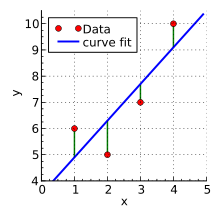

Overdetermined systems are the ones that has more equations than unknowns. Generallly, these systems have no solution. If the equations are independent, then these systems are inconsistent. In cases when they have solution, that requires one of the equations to be a linear combination of others.



In these sytems, $b$ is not in the coloumnspace of $\mathbf A_{m \times n}$, so there is no line that goes exactly throught all the data points. Thus, the best way is to solve for 

$$ \mathbf {Ax \approx b}$$

when $b \not\in C(A)$, so the approximate solution is an exact solution to $Ax = b'$ where $\mathbf b'$ is the projection of $b$ onto $C(A)$.



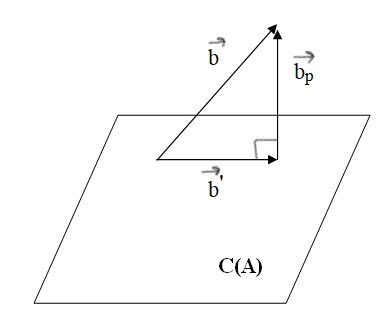

The LLS fitting method finds the best fitting straight line through a set of data points that minimizes the sum of squares of the residuals. The LLS problem is to find a vector $r$ which minimize the Euclidean norm ($l_2$ norm) of the residual:

$$ \vec {\mathbf r} = {\min_{ x \in {R}^{n}} {|| \mathbf {\vec {b} - A \vec {x}}||_2}} $$

We notice that the minimizing of $l_2$ norm is equivalent to minimizing its square that is


$$ \vec {\mathbf r} = {\min_{ x \in {R}^{n}} {|| \mathbf {\vec {b} - A \vec {x}}||_2}^{\mathbf 2}} $$

Note that $$ A = \{ \mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_n\} $$

$$A^T \vec {b_p} = \vec {0}$$

$$A \vec {x} = \vec {b'} = \vec{b} - \vec{b_P}$$

$$A^T A \vec {x} = A^T \vec {b} - A^T \vec{b_P}$$

Since $A^T \vec{b_P} = \vec{0}$  $$ \mathbf {A^T A \vec {x} = A^T \vec {b}}$$

$\mathbf {Ax \approx b}$ has the solution: $ \mathbf {x = (A^T A)^{-1} A^T b}$

LLS methods are used to model data, studying the relationship between variables, fitting parameters of a model to experimental data and fitting a regression line to data.

# QR Factorisation

QR factorisation (a.k.a. QR decomposition) is a the process by which we decompose any $m \times n$ matrix, where $m\geq n$, A with real entries into a product of an orthormal matrix Q and a triangular matrix R:

$$ A = QR $$

## The Gram-Schmidt Process

So how do we decompose $A$ into $QR$? We can use the Gram-Schmidt process, which can be used if the columns of A are linearly independent. The goal of the Gram-Schmidt method is to convert an orthogonal basis of a vector space into and orthonormal basis.

Since $A$ has has linearly independent columns, it can be viewed as being composed of orthogonal vectors $a_i$ that form a basis in some vector space $V$:

$$ A = \{ \mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_n\} $$

And we want to use it to retrieve the orthonormal matrix:

$$ Q = \{ \mathbf{q}_1, \mathbf{q}_2, \dots, \mathbf{q}_n\} $$

The process first requires a definition for the projection operator:

$$ {\rm proj}_\mathbf{u}\mathbf{a} = \frac{< \mathbf{u}, \mathbf{a}>}{< \mathbf{u},\mathbf{u}>} \mathbf{u} $$

The process then proceeds as follows:

$ \mathbf{u}_1 = \mathbf{a}_1 $

$ \mathbf{u}_2 = \mathbf{a}_2 - {\rm proj}_{\mathbf{u}_1}(\mathbf{a}_2), $

$ \mathbf{u}_3 = \mathbf{a}_3 - {\rm proj}_{\mathbf{u}_1}(\mathbf{a}_3) - {\rm proj}_{\mathbf{u}_2}(\mathbf{a}_3), $

$ \vdots $

$ \mathbf{u}_k = \mathbf{a}_k - \sum\limits_{i=1}^{k-1}{\rm proj}_{\mathbf{u}_i} (\mathbf{a}_k) $

We then need to scale each $\mathbf{u}_i$ to ensure orthonormality using:

$$ \mathbf{q}_i = \frac{\mathbf{u}_i}{\| \mathbf{u}_i\|} $$

Which then give us our orthogonal matrix $Q = \{ \mathbf{q}_1, \mathbf{q}_2, \dots, \mathbf{q}_n\}$. The next is to then find $R$, which we can see how to do:

$$ A = QR $$

$$ Q^TA = Q^TQR$$

$$ R = Q^TA $$

$R$ actually takes the form:

$$ \begin{pmatrix}
   <\mathbf{q}_1,\mathbf{a}_1> & <\mathbf{q}_2,\mathbf{a}_2> & <\mathbf{q}_3,\mathbf{a}_3> & \dots\\
   0  & <\mathbf{q}_2,\mathbf{a}_2> & <\mathbf{q}_3,\mathbf{a}_3> & \dots\\
   0  &  0 & <\mathbf{q}_3,\mathbf{a}_3> & \dots\\
   \vdots & \vdots & \vdots & \ddots\\
   \end{pmatrix}
$$

## Numerical Stability

If we perform the Gram-Schmidt procedure numerically, we won't get exact calculations for each $u_i$ due to rounding errors. Due to these rounding errors, the end result is actually a set of output vectors that are significantly non-orthogonal, especially since it is a procedure that will propogate errors through each iteration. In fact, in a calculation for some $u_k$, the error associated with $u_1$ will appear in $k-1$ terms, the error associated with $u_2$ will appear in $k-2$ terms, etc (not to mention how each term in itself will have multiple $u_1$ related terms). It is for this reason that it is considered inherently numerically unstable.

We can slightly modify that Gram-Schmidt method by calculating our output vectors differently:

$ \mathbf{q}_k^{(1)} = \mathbf{a}_k - {\rm proj}_{\mathbf{q}_1}(\mathbf{a}_k) $

$ \mathbf{q}_k^{(2)} = \mathbf{q}^{(1)}_k - {\rm proj}_{\mathbf{q}_2}(\mathbf{q}^{(1)}_k) $

$\vdots$

$ \mathbf{q}_k^{(k-2)} = \mathbf{q}^{(k-3)}_k - {\rm proj}_{\mathbf{q}_{k-2}}(\mathbf{q}^{(k-3)}_k) $

$ \mathbf{q}_k^{(k-1)} = \mathbf{q}^{(k-2)}_k - {\rm proj}_{\mathbf{q}_{k-1}}(\mathbf{q}^{(k-2)}_k) $

$ \mathbf{q}_k = \frac{\mathbf{q}_k^{(k-1)}}{\| \mathbf{q}_k^{(k-1)}\|} $

While the errors are still propogated through each iteration, it is reduced. The modified version isn't afflicted as heavily by the round-off instability. While the reasons are too long to explain in a 4 minute talk, the essence of it is that for some small error $\delta \ll 1$, the modified version (represented by $\delta^n$) sees an error at some greater power than that of the classical version (represented by $\delta^m$), i.e. $\delta^n < \delta^m$ since $n > m$. Details:

https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

### Other Methods
While very simple to implement, the Gram-Schmidt method is not ideal to use. The positive new is that there are two numerically stable methods: Householder transformations and Givens rotations.

The primary difference between these two methods is that Householder transformations are simpler but are more bandwidth heavy, while Givens rotations are more complex to implement but are more bandwidth efficient.

## Solving Linear Least Square Problems

So how do we apply QR factorisation to the linear least squares problem? We can use the fact that:

$$ Ax \approx b $$

has the solution:

$$ x = (A^TA)^{-1}A^Tb $$

We can apply QR factorisation ($A=QR$) to this to get a nice solution for x:

$$ x = (R^TQ^TQR)^{-1}A^Tb $$

$$ x =(R^TR)^{-1}R^TQ^Tb $$

$$ x = R^{-1}(R^T)^{-1}R^TQ^Tb $$

$$ x = R^{-1}Q^Tb $$

In [ ]:
#to use these packages you will probably have to do
#import Pkg and Pkg.add("RDatasets")
using RDatasets #julia package for data sets
using Plots
using LinearAlgebra

In [ ]:
data = dataset("car", "CanPop")

In [ ]:
y = data[1]
p = data[2]
scatter(y,p)
xlabel!("year")
ylabel!("population in millions")

We use a simple polynomial model
$$
\beta_1 + \beta_2 y_k + \beta_3 y_k^2 + ... + \beta_{n}y_k^{n-1} = p_k
$$

Then we get an equation of the form A$\beta$ = p

 n = parameters, N = data, y_k = year, p_k = population

$$
\begin{pmatrix}
1 & y_1 & y_1^2 & ... & y_1^{n-1}\\
1 & y_2 & y_2^2 & ... & ...\\
... & ... & ... & ... & ...\\
1 & ... & ... & ... &y_N^{n-1}
\end{pmatrix}
\begin{pmatrix}
\beta_1 \\
\beta_2  \\
... \\
\beta_n
\end{pmatrix}
=
\begin{pmatrix}
p_1 \\
p_2  \\
... \\
p_N
\end{pmatrix}
$$

In [ ]:
n = 3 #degree of the polynomial
A = zeros(length(data[1]),n) #we create an empty matrix

#we populate the arrays
for i = 1:length(y)
    for j = 1:n
        A[i,j] = (y[i])^(j-1)
    end
end

In [ ]:
A

$$
    \beta = R^{-1} Q^T p
$$

In [ ]:
Q,R = qr(A)
Q = Matrix(Q)
R = Matrix(R)

β = R \ transpose(Q) * p
@show β;

$$
A = QR
$$
$$
m\geq n
$$
$$
(m, n) = (m,n)(n,n)
$$

In [ ]:
Q

In [ ]:
R

$$
{\displaystyle A=QR=Q{\begin{bmatrix}R_{1}\\0\end{bmatrix}}={\begin{bmatrix}Q_{1},Q_{2}\end{bmatrix}}{\begin{bmatrix}R_{1}\\0\end{bmatrix}}=Q_{1}R_{1},}
$$

In [ ]:
year = 2020

#create an array of 1+y^2+...
Y = zeros(n)
for i in 1:n
    Y[i] = year^(i-1)
end

@show Y
@show β
dot(Y,β)

In [ ]:
years(t) = [1,t,t^2,t^3,t^4,t^5]
scatter(y,p, label="data")
plot!(y,β[1] .+ β[2] .* y .+ β[3] .* y.^2, label = "fit")
xlabel!("year")
ylabel!("population in millions")

In [ ]:
scatter(y[3:6],p[3:6], label = "data")
plot!(y[3:6],β[1] .+ β[2] .* y[3:6] .+ β[3] .* y[3:6].^2, label = "fit")
plot!([y[4],y[4]],[p[4],β[1] .+ β[2] .* y[4] .+ β[3] .* y[4].^2], label = "error")
xlabel!("year")
ylabel!("population in millions")

$$ \vec {\mathbf r} = {\min_{ x \in {R}^{n}} {|| \mathbf {\vec {b} - A \vec {x}}||_2}} $$

In [ ]:
norm(p[4] - β[1] .+ β[2] .* y[4] .+ β[3] .* y[4].^2,2)

Overdetermined systems have more equations than unknowns. This usually leads to inconsistencies, that is why we minimize the error.

Underdetermined systems have more unknowns than equations, hence it will fit the data perfectly, but predict poorly. This is sometimes called overfitting. 